In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
features = pd.read_csv("training_set_features.csv", index_col="respondent_id")
labels = pd.read_csv("training_set_labels.csv",index_col="respondent_id")
test_data = pd.read_csv("test_set_features.csv")

In [6]:
def fill_nulls(df):
    for col in df:
        if df[col].dtypes=="object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(h1n1_train_data[col].mean(), inplace=True)
    return df

In [7]:
# h1n1_vaccine Model
h1n1_train_data, h1n1_val_data, h1n1_train_labels, h1n1_val_labels = train_test_split(
    features, labels['h1n1_vaccine'],
    test_size= 0.2)

In [8]:
# Filling Null Values
h1n1_train_data = fill_nulls(h1n1_train_data)
h1n1_val_data = fill_nulls(h1n1_val_data)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [9]:
for col in h1n1_train_data:
    print(col, (h1n1_train_data[col].isnull().sum()/len(h1n1_train_data))*100)

h1n1_concern 0.0
h1n1_knowledge 0.0
behavioral_antiviral_meds 0.0
behavioral_avoidance 0.0
behavioral_face_mask 0.0
behavioral_wash_hands 0.0
behavioral_large_gatherings 0.0
behavioral_outside_home 0.0
behavioral_touch_face 0.0
doctor_recc_h1n1 0.0
doctor_recc_seasonal 0.0
chronic_med_condition 0.0
child_under_6_months 0.0
health_worker 0.0
health_insurance 0.0
opinion_h1n1_vacc_effective 0.0
opinion_h1n1_risk 0.0
opinion_h1n1_sick_from_vacc 0.0
opinion_seas_vacc_effective 0.0
opinion_seas_risk 0.0
opinion_seas_sick_from_vacc 0.0
age_group 0.0
education 0.0
race 0.0
sex 0.0
income_poverty 0.0
marital_status 0.0
rent_or_own 0.0
employment_status 0.0
hhs_geo_region 0.0
census_msa 0.0
household_adults 0.0
household_children 0.0
employment_industry 0.0
employment_occupation 0.0


In [10]:
def category_encode(df):
    for col in df:
        if df[col].dtypes=="object":
            df[col] = df[col].astype('category')
            df[col] = df[col].cat.codes
    return df

In [11]:
h1n1_train_data = category_encode(h1n1_train_data)
h1n1_val_data = category_encode(h1n1_val_data)

<ipython-input-10-c5d2771f9309>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-10-c5d2771f9309>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.codes


In [12]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(h1n1_train_data, h1n1_train_labels)

RandomForestClassifier()

In [13]:
RF_preds = RF_model.predict(h1n1_val_data)
RF_acc_score = accuracy_score(h1n1_val_labels, RF_preds)
RF_prob = RF_model.predict_proba(h1n1_val_data)[:,1]
RF_auc_score = roc_auc_score(h1n1_val_labels, RF_prob)

In [14]:
print(RF_acc_score)
print(RF_auc_score)

0.8547360539123924
0.8676634900118132


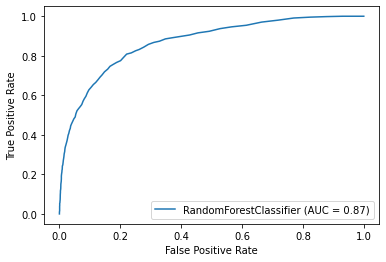

In [15]:
plot_roc_curve(RF_model, h1n1_val_data, h1n1_val_labels)  
plt.show()  

In [16]:
# GETTING THE CONFUSION MATRIX
cm1=np.array(confusion_matrix(h1n1_val_labels,RF_preds))
print(cm1)

[[4057  168]
 [ 608  509]]


<AxesSubplot:title={'center':'Random Forest Classifier- H1N1 Vaccine'}>

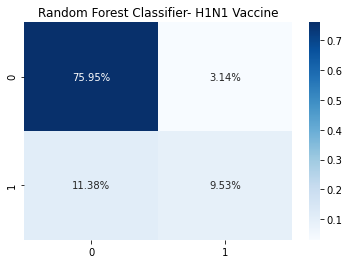

In [28]:
plt.title("Random Forest Classifier- H1N1 Vaccine")
sns.heatmap(cm1/np.sum(cm1), annot=True, 
            fmt='.2%', cmap='Blues')

SEASONAL MODEL 

In [18]:
seasonal_train_data, seasonal_val_data, seasonal_train_labels, seasonal_val_labels = train_test_split(
    features, labels['seasonal_vaccine'],
    test_size= 0.2)

In [19]:
# Fill Null Values

seasonal_train_data = fill_nulls(seasonal_train_data)
seasonal_val_data = fill_nulls(seasonal_val_data)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [20]:
seasonal_train_data = category_encode(seasonal_train_data)
seasonal_val_data = category_encode(seasonal_val_data)

<ipython-input-10-c5d2771f9309>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-10-c5d2771f9309>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.codes


In [21]:
RF_seasonal = RandomForestClassifier(n_estimators=100)
RF_seasonal.fit(seasonal_train_data, seasonal_train_labels)

RandomForestClassifier()

In [22]:
RF_seasonal_preds = RF_seasonal.predict(seasonal_val_data)
seasonal_acc_score = accuracy_score(seasonal_val_labels, RF_seasonal_preds)
RF_seasonal_prob = RF_seasonal.predict_proba(seasonal_val_data)[:,1]
seasonal_auc_score = roc_auc_score(seasonal_val_labels, RF_seasonal_prob)

In [23]:
print(seasonal_acc_score)
print(seasonal_auc_score)

0.788655934107076
0.8605721051247646


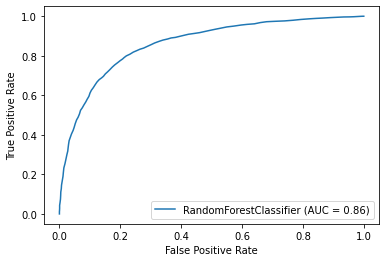

In [24]:
plot_roc_curve(RF_seasonal, seasonal_val_data, seasonal_val_labels)  
plt.show()  

In [25]:
# GETTING THE CONFUSION MATRIX
cm2=np.array(confusion_matrix(seasonal_val_labels,RF_seasonal_preds))
print(cm2)

[[2360  524]
 [ 605 1853]]


<AxesSubplot:title={'center':'Random Forest Classifier- Seasonal Vaccine'}>

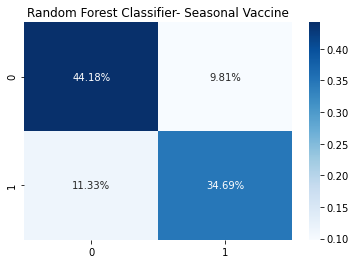

In [29]:
plt.title("Random Forest Classifier- Seasonal Vaccine")
sns.heatmap(cm2/np.sum(cm2), annot=True, 
            fmt='.2%', cmap='Blues')

In [27]:
print("AVG AUC: ", (RF_auc_score+seasonal_auc_score)/2)

AVG AUC:  0.8641177975682889
